In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [22]:
data = pd.read_csv('kaggle_train.csv')
data.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,15.000000,1,157.0,36,3010.532051,0.000000,0.014620,0.000000,0.0,May,2,2,3,2,Returning_Visitor,True,False
1,0,0.000000,0,0.0,57,820.363636,0.035088,0.061651,0.000000,0.0,June,3,2,3,13,Returning_Visitor,False,False
2,9,228.200000,1,0.0,7,186.400000,0.020000,0.030000,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
3,3,72.600000,0,0.0,17,544.100000,0.000000,0.002000,0.000000,0.0,Sep,2,2,9,2,New_Visitor,False,False
4,0,0.000000,4,8.0,66,1514.836310,0.022887,0.044914,0.000000,0.0,Dec,2,2,6,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.000000,0,0.0,3,65.500000,0.066667,0.100000,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,False,False
96,11,104.194444,3,8.0,75,1753.761111,0.002381,0.018278,20.048421,0.0,Nov,2,2,3,2,Returning_Visitor,False,True
97,5,85.166667,1,8.0,95,3715.777564,0.010101,0.011852,0.000000,0.0,Jul,2,4,4,1,Returning_Visitor,False,False
98,5,97.500000,0,0.0,24,758.144444,0.040000,0.059846,0.000000,0.0,Mar,3,2,2,1,Returning_Visitor,True,False


In [23]:
missing = data.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [24]:
# Mapping categorical features
month_mapping = {
    "Feb": 0, "Mar": 1, "May": 2, "June": 3, "Jul": 4, 
    "Aug": 5, "Sep": 6, "Oct": 7, "Nov": 8, "Dec": 9
}
data["Month"] = data["Month"].map(month_mapping)

visitor_mapping = {
    "Returning_Visitor": 0, "New_Visitor": 1, "Other": 2
}
data["VisitorType"] = data["VisitorType"].map(visitor_mapping)

weekend = {False: 0, True: 1}
data["Weekend"] = data["Weekend"].map(weekend)

In [25]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,15.0,1,157.0,36,3010.532051,0.000000,0.014620,0.0,0.0,2,2,2,3,2,0,1,False
1,0,0.0,0,0.0,57,820.363636,0.035088,0.061651,0.0,0.0,3,3,2,3,13,0,0,False
2,9,228.2,1,0.0,7,186.400000,0.020000,0.030000,0.0,0.0,8,2,2,1,20,0,0,False
3,3,72.6,0,0.0,17,544.100000,0.000000,0.002000,0.0,0.0,6,2,2,9,2,1,0,False
4,0,0.0,4,8.0,66,1514.836310,0.022887,0.044914,0.0,0.0,9,2,2,6,2,0,0,False


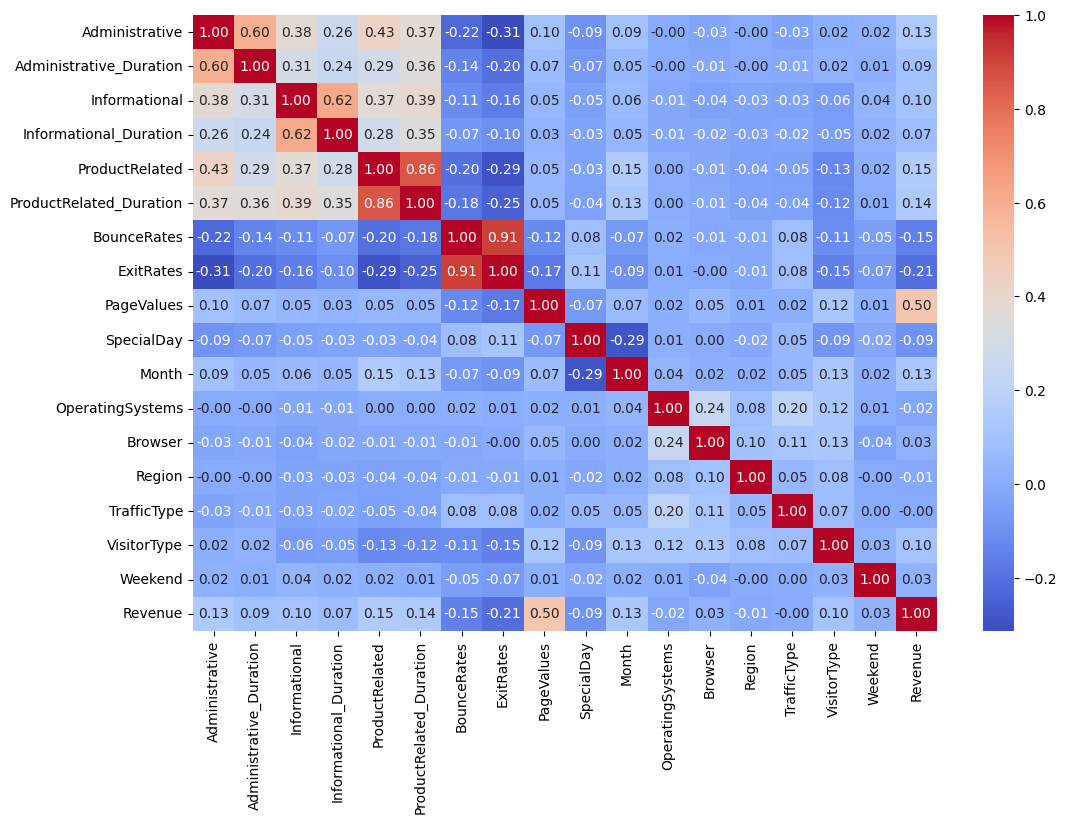

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [27]:
# Dropping unnecessary columns
data = data.drop(columns=['ExitRates', 'ProductRelated', 'Informational', 'Administrative'])

In [28]:
data.fillna(data.median(), inplace=True)

In [29]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [30]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [32]:
# from sklearn.model_selection import train_test_split

# # Separate data into two groups: Revenue=True and Revenue=False
# X_true = X[y == 1]   # Data where Revenue=True
# X_false = X[y == 0]  # Data where Revenue=False
# y_true = y[y == 1]
# y_false = y[y == 0]

# # Split separately for True and False
# X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X_true, y_true, test_size=0.2, random_state=42)
# X_train_false, X_test_false, y_train_false, y_test_false = train_test_split(X_false, y_false, test_size=0.2, random_state=42)

# # Combine True and False splits
# X_train = pd.concat([X_train_true, X_train_false])
# X_test = pd.concat([X_test_true, X_test_false])
# y_train = pd.concat([y_train_true, y_train_false])
# y_test = pd.concat([y_test_true, y_test_false])

# # Shuffle to mix the data
# X_train, y_train = X_train.sample(frac=1, random_state=42), y_train.sample(frac=1, random_state=42)
# X_test, y_test = X_test.sample(frac=1, random_state=42), y_test.sample(frac=1, random_state=42)

# # Check the new class distribution
# print("Class distribution in training set:\n", y_train.value_counts(normalize=True))
# print("Class distribution in test set:\n", y_test.value_counts(normalize=True))


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - F1 Score: {f1_lr:.4f}")
print(f"Logistic Regression - Precision: {precision_lr:.4f}")
print(f"Logistic Regression - Recall: {recall_lr:.4f}")

Logistic Regression - Accuracy: 0.8414
Logistic Regression - F1 Score: 0.8333
Logistic Regression - Precision: 0.8785
Logistic Regression - Recall: 0.7926


In [35]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - F1 Score: {f1_dt:.4f}")
print(f"Decision Tree - Precision: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")

Decision Tree - Accuracy: 0.8909
Decision Tree - F1 Score: 0.8926
Decision Tree - Precision: 0.8793
Decision Tree - Recall: 0.9064


In [36]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")
print(f"SVM - Precision: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")

SVM - Accuracy: 0.8717
SVM - F1 Score: 0.8677
SVM - Precision: 0.8967
SVM - Recall: 0.8404


In [37]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")


Random Forest - Accuracy: 0.9271
Random Forest - F1 Score: 0.9285
Random Forest - Precision: 0.9110
Random Forest - Recall: 0.9468


In [38]:
from xgboost import XGBClassifier

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
# Now make predictions

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f"Random Forest - Accuracy: {accuracy_xgb:.4f}")
print(f"Random Forest - F1 Score: {f1_xgb:.4f}")
print(f"Random Forest - Precision: {precision_xgb:.4f}")
print(f"Random Forest - Recall: {recall_xgb:.4f}")

Random Forest - Accuracy: 0.9276
Random Forest - F1 Score: 0.9288
Random Forest - Precision: 0.9149
Random Forest - Recall: 0.9431


C:\Users\SOHAM PALKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# -------------------------------
# 1. Bagging Classifier (Base: Decision Tree)
# -------------------------------
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Evaluation metrics for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)

print("\nBagging Classifier:")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"F1 Score: {f1_bagging:.4f}")
print(f"Precision: {precision_bagging:.4f}")
print(f"Recall: {recall_bagging:.4f}")

# -------------------------------
# 2. AdaBoost Classifier
# -------------------------------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluation metrics for AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)

print("\nAdaBoost Classifier:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"F1 Score: {f1_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")

# -------------------------------
# 3. Gradient Boosting Classifier
# -------------------------------
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")



Bagging Classifier:
Accuracy: 0.9289
F1 Score: 0.9305
Precision: 0.9109
Recall: 0.9511

AdaBoost Classifier:
Accuracy: 0.8917
F1 Score: 0.8911
Precision: 0.8966
Recall: 0.8856

Gradient Boosting Classifier:
Accuracy: 0.8989
F1 Score: 0.8992
Precision: 0.8972
Recall: 0.9011


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# -------------------------------
# Load Kaggle Test Data
# -------------------------------
test_df = pd.read_csv('kaggle_test.csv')

# Save IDs for final submission
test_ids = test_df['id']

# Drop unnecessary columns (same as training)
cols_to_drop = ['ExitRates', 'ProductRelated', 'Informational', 'Administrative', 'id']
cols_to_drop=[]
test_df = test_df.drop(columns=[col for col in cols_to_drop if col in test_df.columns])

# -------------------------------
# Handle Categorical Encoding (Use Training Encoders)
# -------------------------------
categorical_cols = ['Month', 'VisitorType']  # Adjust based on your dataset
label_encoders = {}  # Store trained encoders

for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        le.fit(X_train[col])  # Fit on training data only!
        
        # Transform test data, using -1 for unseen categories
        test_df[col] = test_df[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# -------------------------------
# Align Test Data Columns with Training Data
# -------------------------------
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with 0 values

# Ensure column order matches training data
test_df = test_df[X_train.columns]

# -------------------------------
# Make Predictions for All Models
# -------------------------------
dt_predictions = rf_model.predict(test_df).astype(int)   # Decision Tree
svm_predictions = xgb_model.predict(test_df).astype(int) # SVM
rf_predictions = rf_model.predict(test_df).astype(int)   # Random Forest

# -------------------------------
# Majority Voting for Final Prediction
# -------------------------------
ensemble_predictions = (dt_predictions + svm_predictions + rf_predictions) >= 2  # Majority vote
ensemble_predictions = ensemble_predictions.astype(int)  # Convert to 1/0

# -------------------------------
# Save Final Predictions to CSV
# -------------------------------
submission = pd.DataFrame({'id': test_ids, 'revenue': ensemble_predictions})
submission.to_csv('predictions.csv', index=False)

print("✅ Majority-vote predictions.csv has been saved!")


✅ Majority-vote predictions.csv has been saved!
